할일

1. 값이랑 검출하한값 컬럼 합치기 위도 경도, 보정 기준 날짜 삭제 o
3. 측정지점 컬럼을 처리할 방법 정하기 
4. '일일 방류량', '총 방류량' 넣기 / 일일 o 총 x 
5. 날씨 데이터 추가 

프로젝트 방향성

**우리가 한 것은 이 날짜별 검출량이랑 일별 뉴스 수,날씨, 후쿠시마 오염수에 관한 도메인 지식인데 얘네들을 어떻게 활용할 것인가**

1. 목적으로 교육용(실제 조사로 나온 값과 현실 값은 이렇다, 이정도 수치는 아무런 영향도 없다. 등 설득하기)<br>라고는 했는데 그렇다면 그걸 이룰 수 있는지?

2. 지금 후쿠시마 해안의 데이터만 활용했는데, 막상 우리나라 해안은 안전한가? 는 전혀 모름<br>
그러면 데이터를 조금이나마 찾아서 써야하는지? 방향을 틀어서 숨길 것인지?

3. 데이터 수집방법은 막상 인터넷 서칭인데,,, 물론 힘겹게 해외 사이트 뒤져보며 찾은 노력이 경험이 <br>되었다고 내세울 것인지? 그게 아니라면 데이터 수집 과목에서 이 프로젝트의 특색을 어떻게 내세울 것인지?<br>
(발표 포함할 내용에 데이터 수집 계획 수립 & 선정,수집,정리 과정에 관한 내용 작성)<br>

4. 선정,수집,정리 과정을 기록 안해놔서 다시 정리해야함

5. 

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# 한국어 지원 글꼴
mpl.rcParams['font.family'] = 'Malgun Gothic'
"mpl.rcParams['axes.unicode_minus'] = False"


import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('h3방류06부터10.xlsx')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   측정 지점 수   990 non-null    object 
 1   보정 기준 날짜  990 non-null    object 
 2   값         84 non-null     float64
 3   검출 하한값    906 non-null    float64
 4   위치        990 non-null    object 
dtypes: float64(2), object(3)
memory usage: 38.8+ KB


## 1. 컬럼 정리

In [57]:
df['값'] = df['값'].fillna(0)
df['검출 하한값'] = df['검출 하한값'].fillna(0)
df['검출 하한값'] = df['검출 하한값'] + df['값']
df['날짜'] = df['보정 기준 날짜']

df.drop(columns=['값','보정 기준 날짜','위치'],inplace = True)

df = df.rename(columns={'측정 지점 수': '지점'})

df

,지점,검출 하한값,날짜
0,T-MA,0.35,2023-06-01
1,T-22,0.35,2023-06-01
2,T-13-1,0.35,2023-06-01
3,T-2,0.28,2023-06-03
4,T-A2,0.33,2023-06-05
...,...,...,...
985,T-A3,6.60,2023/10/28
986,T-0-1A,8.30,2023/10/28
987,T-A1,6.60,2023/10/28
988,T-0-2,8.30,2023/10/28


In [58]:
df[df['검출 하한값'] == 0].count()

지점        0
검출 하한값    0
날짜        0
dtype: int64

## 4. N차 방류날짜로 부터 D-day 컬럼 추가

* 방류 전 날짜에는 데이터가 매일 있지않음 <br>
-> 방류량부턴 매일 측정지점마다 있음, 측정지점을 어떻게 처리할 것인가<br>

1. 한 곳을 지점해서 한다
2. 일별 평균을 내린다
3. 기기 제일 많은 애 뽑는다.
4. 일별groupby 전처리 내린다.
5. **냅두고 시각화,분석 때 선택껏 한다**

### 정보

*1 세제곱미터(m3)는 1톤(1,000L)<br>

1차방류: 2023.08.24~2023.09.11- 7,788 세제곱미터(m3)<br>
2차방류: 2023.10.05~2023.10.23 - 7,810 세제곱미터(m3)<br>
3차방류: 2023.11.02~2023.11.20 - 7,753 세제곱미터(m3)<br>
4차방류: 2024.02.28~2024.03.17 - 7,794 세제곱미터(m3)<br>

1,2,3,4차 모두 일평균 460 m3, 7,800(m3)기준으로 1.5조 베크럴이 포함됨<br>
출처: 대한민국 정책브리핑 홈페이지

In [59]:
# 방류일정
start1 = '2023-08-24' ; start2 = '2023-10-05'
end1 = '2023-09-11' ; end2 = '2023-10-23'
volume = 460

# 날짜부분 시간화
df['날짜'] = pd.to_datetime(df['날짜'])

# 방류량 삽입

df['1차'] = 0
df['2차'] = 0
df.loc[(df['날짜'] >= start1) & (df['날짜'] <= end1), '1차'] = volume
df.loc[(df['날짜'] >= start2) & (df['날짜'] <= end2), '2차'] = volume


df.head(1)

,지점,검출 하한값,날짜,1차,2차
0,T-MA,0.35,2023-06-01,0,0


In [60]:
# 값 삽입 잘 되었나 확인
print(df['1차'].value_counts())
print(df['2차'].value_counts())

0      752
460    238
Name: 1차, dtype: int64
0      792
460    198
Name: 2차, dtype: int64


* 지점을 보니까 갯수가 80개 이상인 값 이외는 20개 이하임

In [61]:
counts = df['지점'].value_counts()
values = counts[counts >= 80].index.tolist()
values

['T-2',
 'T-1',
 'T-A2',
 'T-A1',
 'T-A3',
 'T-0-2',
 'T-0-3',
 'T-0-1A',
 'T-0-1',
 'T-0-3A']

* 그래서 80개 이상으로 추리기

In [62]:
df = df[df['지점'].isin(values)].reset_index(drop=True)
df

,지점,검출 하한값,날짜,1차,2차
0,T-2,0.28,2023-06-03,0,0
1,T-A2,0.33,2023-06-05,0,0
2,T-1,0.28,2023-06-05,0,0
3,T-2,0.28,2023-06-05,0,0
4,T-0-1,0.35,2023-06-05,0,0
...,...,...,...,...,...
827,T-A3,6.60,2023-10-28,0,0
828,T-0-1A,8.30,2023-10-28,0,0
829,T-A1,6.60,2023-10-28,0,0
830,T-0-2,8.30,2023-10-28,0,0


In [63]:
df['총 방출량'] = 0

# 일평균 방출량
daily_average_volume = 460

# 날짜별 방출량 계산
for i in range(len(df)):
    current_date = df.loc[i, '날짜']
    
    # 2023년 8월 24일부터 9월 11일까지 매일 460씩 증가
    if current_date >= pd.Timestamp('2023-08-24') and current_date <= pd.Timestamp('2023-09-11'):
        df.loc[i, '총 방출량'] = (current_date - pd.Timestamp('2023-08-24')).days * daily_average_volume
    
    # 9월 12일부터 10월 4일까지 9월 11일 값 유지
    elif current_date > pd.Timestamp('2023-09-11') and current_date <= pd.Timestamp('2023-10-04'):
        df.loc[i, '총 방출량'] = (pd.Timestamp('2023-09-11') - pd.Timestamp('2023-08-24')).days * daily_average_volume
    
    # 10월 5일부터 10월 23일까지 매일 460씩 증가
    elif current_date >= pd.Timestamp('2023-10-05') and current_date <= pd.Timestamp('2023-10-23'):
        df.loc[i, '총 방출량'] = ((pd.Timestamp('2023-09-11') - pd.Timestamp('2023-08-24')).days * daily_average_volume + 
                                  (current_date - pd.Timestamp('2023-10-05')).days * daily_average_volume)
    
    # 10월 24일부터 10월 28일까지 10월 23일 값 유지
    elif current_date > pd.Timestamp('2023-10-23') and current_date <= pd.Timestamp('2023-10-28'):
        df.loc[i, '총 방출량'] = ((pd.Timestamp('2023-09-11') - pd.Timestamp('2023-08-24')).days * daily_average_volume + 
                                  (pd.Timestamp('2023-10-23') - pd.Timestamp('2023-10-05')).days * daily_average_volume)



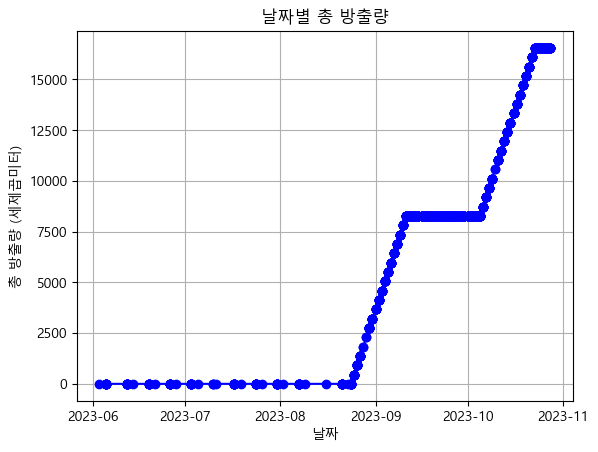

In [64]:
plt.plot(df['날짜'], df['총 방출량'], marker='o', linestyle='-', color='b')
plt.title('날짜별 총 방출량')
plt.xlabel('날짜')
plt.ylabel('총 방출량 (세제곱미터)')
plt.grid(True)
plt.show()

# 날씨데이터

In [65]:
weather = pd.read_excel('날씨.xlsx')
weather['날짜'] = pd.to_datetime(weather['날짜'], origin='1899-12-30', unit='D')
df2 = pd.merge(df, weather, on='날짜', how='left')
df2

,지점,검출 하한값,날짜,1차,2차,총 방출량,평균기온,강수량,일조시간,평균풍속
0,T-2,0.28,2023-06-03,0,0,0,19.5,0.0,5.0,3.0
1,T-A2,0.33,2023-06-05,0,0,0,22.1,0.0,13.2,2.6
2,T-1,0.28,2023-06-05,0,0,0,22.1,0.0,13.2,2.6
3,T-2,0.28,2023-06-05,0,0,0,22.1,0.0,13.2,2.6
4,T-0-1,0.35,2023-06-05,0,0,0,22.1,0.0,13.2,2.6
...,...,...,...,...,...,...,...,...,...,...
827,T-A3,6.60,2023-10-28,0,0,16560,14.5,0.0,6.6,1.3
828,T-0-1A,8.30,2023-10-28,0,0,16560,14.5,0.0,6.6,1.3
829,T-A1,6.60,2023-10-28,0,0,16560,14.5,0.0,6.6,1.3
830,T-0-2,8.30,2023-10-28,0,0,16560,14.5,0.0,6.6,1.3


# 시각화(탐색적 데이터 분석)

**탐색적 데이터 분석(EDA) 볼 떄 주의사항**<p>
### * 컬럼들 잘 확인해주세요. df,df2,df3,df4 다 컬럼이 다릅니다


## 1. 검출 하한값 분포

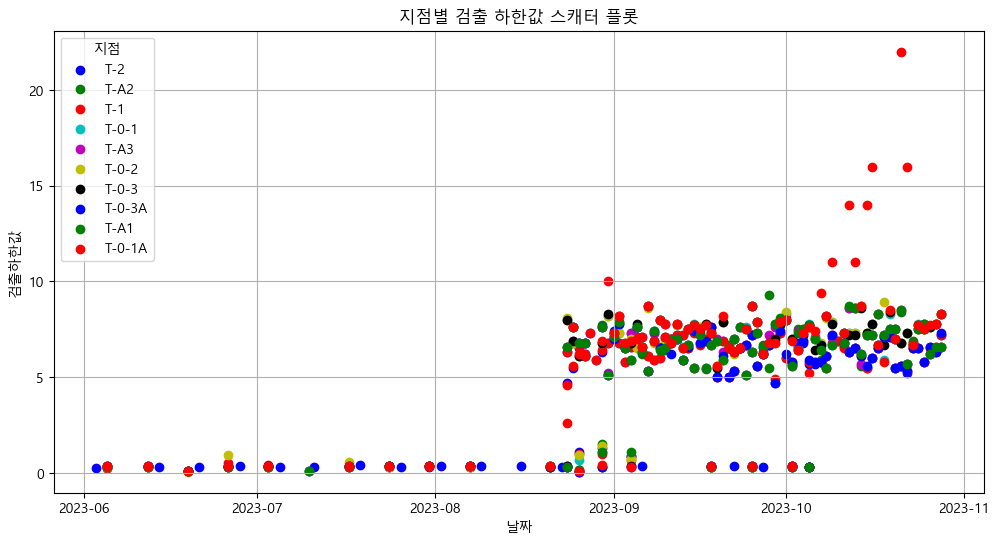

In [66]:
#EDA
unique_sites = df['지점'].unique()
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # 색상 리스트
color_map = {site: colors[i % len(colors)] for i, site in enumerate(unique_sites)}

plt.figure(figsize=(12, 6))

for site in unique_sites:
    site_data = df[df['지점'] == site]
    plt.scatter(site_data['날짜'], site_data['검출 하한값'], color=color_map[site], label=site)

plt.title('지점별 검출 하한값 스캐터 플롯')
plt.xlabel('날짜')
plt.ylabel('검출하한값')
plt.legend(title='지점')
plt.grid(True)
plt.show()

### 해석
* 방류 전에는 거의 0임. 아무래도 버렸던 20개 이하인 지점들이 방류 전이었나봄(확인 안함)<br>
-> 그러면 그래프는 8월 24일부터 다시 그리는 걸로<br>

* 'T-0-1A'가 이상치를 보임<br>
-> 검출 하한 값이 '검출량은 이 값보단 낮은 수치다'를 말하는 것 같은데<br>
그렇다보니 15,20 뜬 값들을 처리할 방법도 생각해야함

==> 해결: T-0-1A가 바로 방출구 옆임;; 그래서 잘 방류가 안되서 높게 나올 때도 있나봄

* DT값은 검출할 수 있는 최소 농도를 나타내고, <br>ND값은 그 이하의 농도이거나 아예 검출되지 않았다는 것을 의미합니다

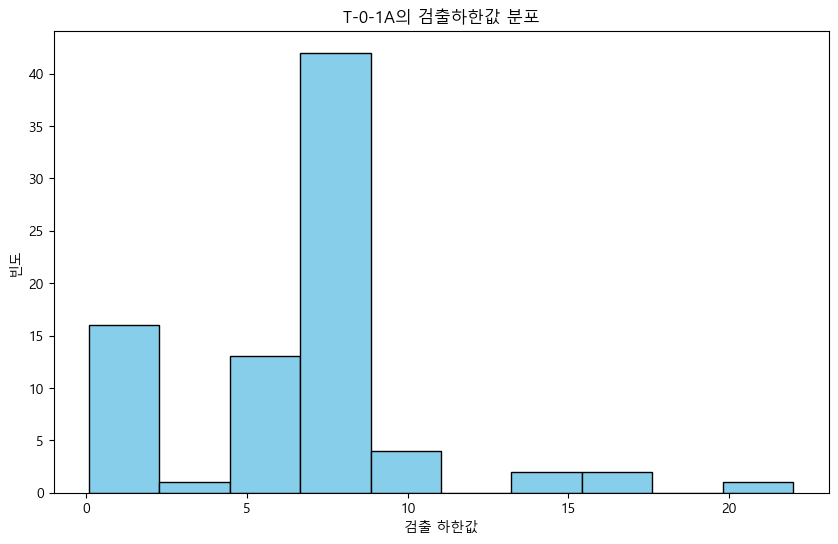

In [67]:
filtered_df = df[df['지점'] == 'T-0-1A']

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['검출 하한값'], bins=10, color='skyblue', edgecolor='black')

plt.title('T-0-1A의 검출하한값 분포')
plt.xlabel('검출 하한값')
plt.ylabel('빈도')

plt.show()

### => 그래서
### 1. 방류 이후 데이터를 살펴보자
### 2. 이상치 제거를 하자!

### 히트맵

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


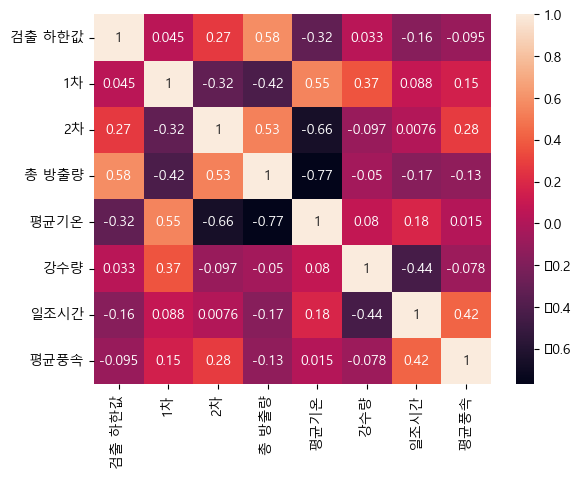

In [68]:
df2.corr()

import seaborn as sns
df3 = df2[['검출 하한값','1차','2차','총 방출량','평균기온','강수량','일조시간','평균풍속']]

sns.heatmap(df3.corr(), annot=True)

## 방류 이후의 데이터

In [69]:
df4 = df2[df2['날짜'] >= '2023-08-23']
df4

,지점,검출 하한값,날짜,1차,2차,총 방출량,평균기온,강수량,일조시간,평균풍속
112,T-2,0.33,2023-08-23,0,0,0,28.4,0.0,9.8,3.1
113,T-A1,0.32,2023-08-24,460,0,0,29.0,0.0,12.0,3.3
114,T-0-3,8.00,2023-08-24,460,0,0,29.0,0.0,12.0,3.3
115,T-0-1A,2.60,2023-08-24,460,0,0,29.0,0.0,12.0,3.3
116,T-2,6.30,2023-08-24,460,0,0,29.0,0.0,12.0,3.3
...,...,...,...,...,...,...,...,...,...,...
827,T-A3,6.60,2023-10-28,0,0,16560,14.5,0.0,6.6,1.3
828,T-0-1A,8.30,2023-10-28,0,0,16560,14.5,0.0,6.6,1.3
829,T-A1,6.60,2023-10-28,0,0,16560,14.5,0.0,6.6,1.3
830,T-0-2,8.30,2023-10-28,0,0,16560,14.5,0.0,6.6,1.3


#### 이상치 제거

In [70]:
# 상위 99% 값을 cut_point로 지정
cut_point = df4["검출 하한값"].quantile(0.99)
df4=df4[df4['검출 하한값'] < cut_point]

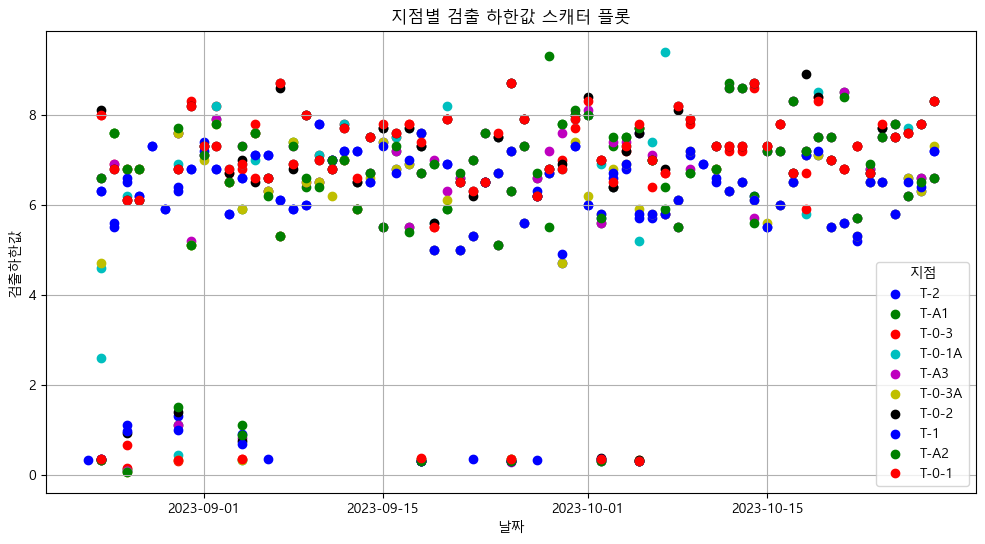

In [71]:
#EDA
unique_sites = df4['지점'].unique()
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # 색상 리스트
color_map = {site: colors[i % len(colors)] for i, site in enumerate(unique_sites)}

plt.figure(figsize=(12, 6))

for site in unique_sites:
    site_data = df4[df4['지점'] == site]
    plt.scatter(site_data['날짜'], site_data['검출 하한값'], color=color_map[site], label=site)

plt.title('지점별 검출 하한값 스캐터 플롯')
plt.xlabel('날짜')
plt.ylabel('검출하한값')
plt.legend(title='지점')
plt.grid(True)
plt.show()

In [72]:
df4['검출 하한값'].describe()

count    712.000000
mean       6.139596
std        2.217671
min        0.065000
25%        5.900000
50%        6.800000
75%        7.400000
max        9.400000
Name: 검출 하한값, dtype: float64

In [73]:
# 위 통계량을 통해 평균값은 6.14... 25퍼이상이 6인걸로 보아... 대부분은... 등?

### 정규분포를 따르고 있는가?

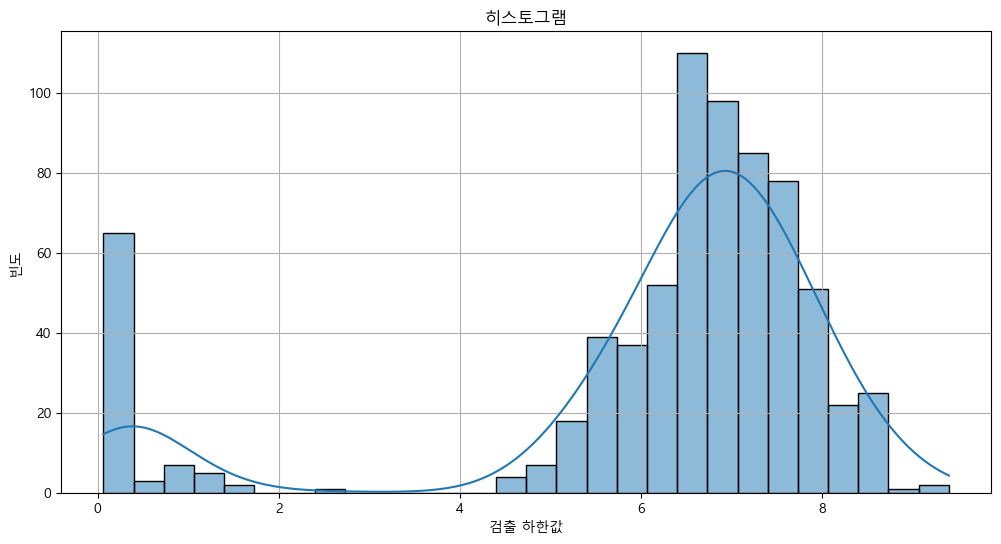

In [74]:
plt.figure(figsize=(12, 6))
sns.histplot(df4['검출 하한값'], kde=True)
plt.title('히스토그램')
plt.xlabel('검출 하한값')
plt.ylabel('빈도')
plt.grid(True)
plt.show()
# 주로 6~8이 가장 많은 값을 보였고 0에 가까운 값들도 많았다.

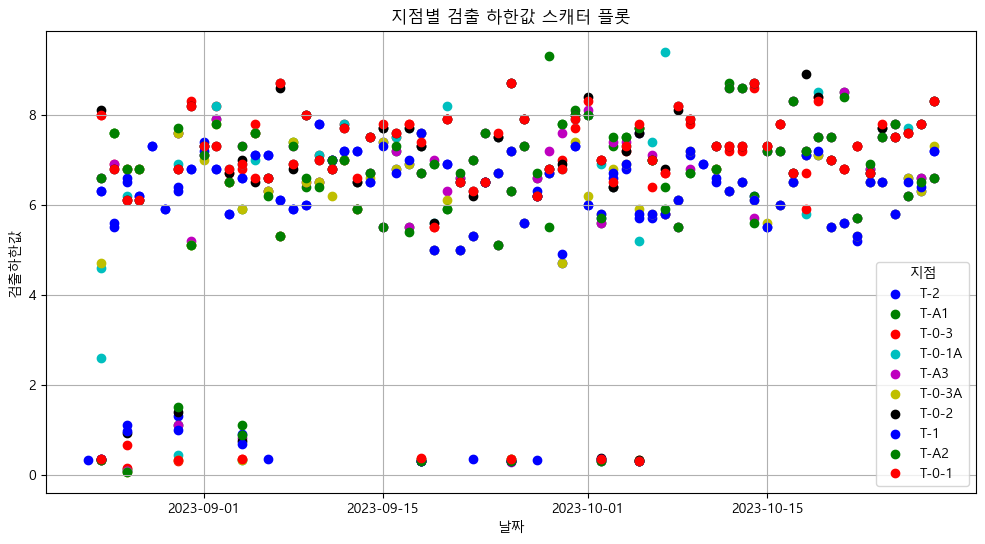

In [75]:
#EDA
unique_sites = df4['지점'].unique()
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # 색상 리스트
color_map = {site: colors[i % len(colors)] for i, site in enumerate(unique_sites)}

plt.figure(figsize=(12, 6))

for site in unique_sites:
    site_data = df4[df4['지점'] == site]
    plt.scatter(site_data['날짜'], site_data['검출 하한값'], color=color_map[site], label=site)

plt.title('지점별 검출 하한값 스캐터 플롯')
plt.xlabel('날짜')
plt.ylabel('검출하한값')
plt.legend(title='지점')
plt.grid(True)
plt.show()

### 이진 변수 분석

In [76]:
df4.columns

Index(['지점', '검출 하한값', '날짜', '1차', '2차', '총 방출량', '평균기온', '강수량', '일조시간',
       '평균풍속'],
      dtype='object')

#### 연속형 변수 — 연속형 변수 관계 파악 <br>

* 검출 하한값과 강수량 변수 관계
: 무의미?

c:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Figure size 1000x500 with 0 Axes>

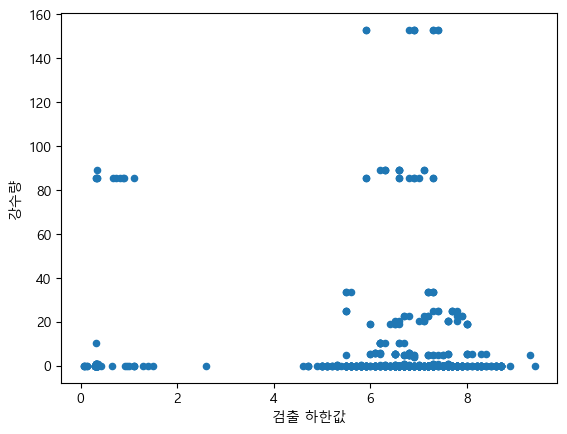

In [77]:
plt.figure(figsize=(10,5))
df4.plot.scatter(x='검출 하한값',y='강수량')
plt.show()

* 검출 하한값과 지점별 변수 관계
: 균일하다? 세개 정도가 수치가 좀 낮은데 얘네 위치 표시한 이미지 보면 2개가 육지쪽이긴 함

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


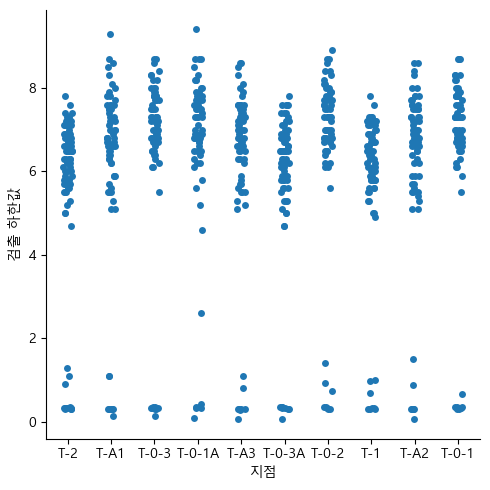

In [78]:
sns.catplot(x='지점',y='검출 하한값', data=df4)

# 한국H3 데이터

얘네는 이제 어떻게 써먹을거냐?<br>
우리나라 해안에 오려면 서칭해보니 3~5년은 걸린다.<br>
그 때의 분석을 생각했을 때 필요한 데이터도 이렇게 구할 수 있다. <br>

In [110]:
kr = pd.read_excel('한국H3.xlsx')
kr = pd.DataFrame(kr)
kr['값'] = kr['값'].str.replace('<', '').astype(float)

In [111]:
kr.head()

,지역,날짜,값
0,제주,2023-08-14,0.154
1,제주,2023-08-14,0.159
2,제주,2023-08-14,0.155
3,제주,2023-08-14,0.157
4,제주,2023-08-15,0.159


In [117]:
kr2 = pd.read_excel('해양방사성물질 분석결과.xlsx')
kr2 = pd.DataFrame(kr2)
kr2['값'] = kr2['값'].str.replace('<', '').astype(float)

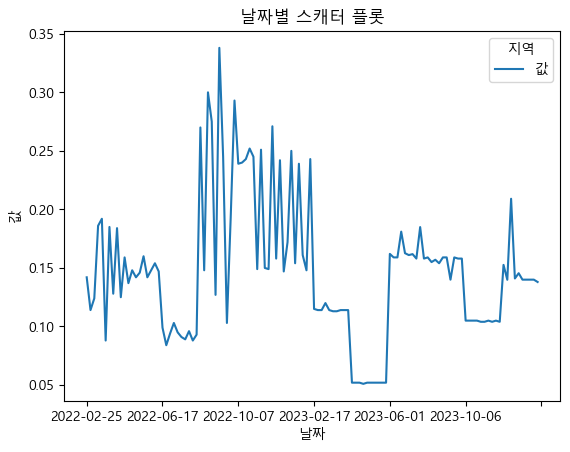

In [119]:
# 지역별 스캐터 플롯 그리기
kr2.plot(x='날짜',y='값')
plt.title('날짜별 스캐터 플롯')
plt.xlabel('날짜')
plt.ylabel('값')
plt.legend(title='지역')
plt.show()

# 패턴은 모름